In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
from glob import glob

In [3]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:
import cv2

In [5]:
BATCH_SIZE = 32
IMAGE_W = 32
IMAGE_H = 32
CHANNELS = 3
LEARNING_RATE = 0.005
EPOCHS = 5
logs_path = '/tmp/catdog/'

In [6]:
def LeNet(X):
    mu = 0
    sigma = 0.05
    fc_1_in = 400
    fc_1_out = 120
    fc_2_out = 84
    
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5, 5, CHANNELS, 6], mean=mu, stddev = sigma)),
        'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev = sigma)),
        'wfc1': tf.Variable(tf.truncated_normal([fc_1_in, fc_1_out], mean=mu, stddev = sigma)),
        'wfc2': tf.Variable(tf.truncated_normal([fc_1_out, fc_2_out], mean=mu, stddev = sigma)),
        'out': tf.Variable(tf.truncated_normal([fc_2_out, n_classes], mean=mu, stddev = sigma))
    }
    
    bias = {
        'bc1': tf.Variable(tf.zeros([6])),
        'bc2': tf.Variable(tf.zeros([16])),
        'bfc1': tf.Variable(tf.zeros([fc_1_out])),
        'bfc2': tf.Variable(tf.zeros([fc_2_out])),
        'out': tf.Variable(tf.zeros([n_classes]))
    }
    
    # Convolutional Network 1
    # [32, 32, 3] --> [28, 28, 6]
    conv_1 = tf.nn.conv2d(X, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID')
    conv_1 = tf.nn.bias_add(conv_1, bias=bias['bc1'])
    
    # Activation Function
    # [28, 28, 6] --> [28, 28, 6]
    activate_2 = tf.nn.relu(conv_1)
    
    # pooling
    # [28, 28, 6] --> [14, 14, 6]
    pool_3 = tf.nn.max_pool(activate_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Convolutional Network 2
    # [14, 14, 6] --> [10, 10, 6]
    conv_4 = tf.nn.conv2d(pool_3, weights['wc2'], strides=[1, 1, 1, 1], padding='VALID')
    conv_4 = tf.nn.bias_add(conv_4, bias=bias['bc2'])
    
    # Activation Function
    # [10, 10, 6] --> [10, 10, 16]
    activate_5 = tf.nn.relu(conv_4)
    
    # pooling
    # [5, 5, 16] --> [5, 5, 16]
    pool_6 = tf.nn.max_pool(activate_5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten
    # [5, 5, 16] --> fc_1_in
    flatten_7 = tf.contrib.layers.flatten(pool_6)
    
    # Fully connected layer 1
    # fc_1_in --> fc_1_out
    fc_8 = tf.add(tf.matmul(flatten_7, weights['wfc1']), bias['bfc1'])
    
    # Activation
    # fc_1_out --> fc_1_out
    activate_9 = tf.nn.relu(fc_8)
    
    # Dropout
    dropout_10 = tf.nn.dropout(activate_9, keep_prob=keep_prob)
    
    # Fully connected layer 2
    # fc_1_out --> fc_2_out
    fc_11 = tf.add(tf.matmul(dropout_10, weights['wfc2']), bias['bfc2'])
    
    # Activation
    # fc_2_out --> fc_2_out
    activate_12 = tf.nn.relu(fc_11)
    
    # Dropout
    dropout_13 = tf.nn.dropout(activate_12, keep_prob=keep_prob)
    
    # Fully connected layer 3
    logits = tf.add(tf.matmul(dropout_13, weights['out']), bias['out'])
    
    return logits    

In [7]:
training_path = 'dataset/training_set/'
# validation_path = 'dataset/test_set/'
test_path = 'dataset/test_set/'

In [8]:
classes = [cls.split('/')[-1] for cls in glob(training_path+ '*')]
print(classes)
n_classes = len(classes)
print(n_classes)

['dogs', 'cats']
2


In [9]:
training_data = glob(training_path + '*/*')
training_labels = [label_path.split('/')[-2] for label_path in training_data]

test_data = glob(test_path + '*/*')
test_labels = [label_path.split('/')[-2] for label_path in test_data]

In [10]:
training_labels[:10]

['dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs']

In [11]:
len(training_data), len(training_labels), len(test_data), len(test_labels)

(8000, 8000, 2000, 2000)

In [12]:
X_train, X_valid, Y_train, Y_valid = train_test_split(training_data, training_labels, test_size = 0.2)

In [13]:
X_train, Y_train = shuffle(X_train, Y_train)
X_valid, Y_valid = shuffle(X_valid, Y_valid)
X_test, Y_test = shuffle(test_data, test_labels)

In [14]:
len(X_test), len(Y_test)

(2000, 2000)

In [15]:
len(X_train), len(Y_train)

(6400, 6400)

In [16]:
len(X_valid), len(Y_valid)

(1600, 1600)

In [17]:
#grayscale
#To maintain the dimension of (32,32,1)
def rgb2gray(rgb):
    with tf.Session() as sess:
        data = tf.image.rgb_to_grayscale(rgb)
        data = data.eval(session=sess)
    return data

In [18]:
def normalize(x):
    x= x.astype(np.float32)
    return ((x - 128)/128)

In [19]:
def pre_process(data):
    gray_data = rgb2gray(data)
    return normalize(gray_data)

In [20]:
% matplotlib inline


(375, 499, 3)


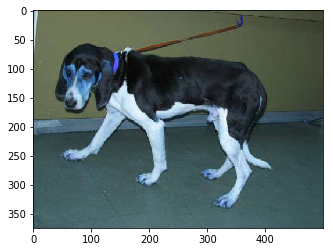

In [21]:
img = cv2.imread(X_train[0])
print(img.shape)
plt.imshow(img)


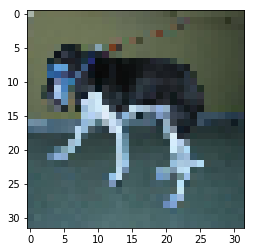

In [22]:
img = cv2.resize(img, (32,32))
plt.imshow(img)

with tf.Session() as sess:
    img_file = tf.read_file(training_data[0])
    img_decoded = tf.image.decode_image(img_file)
    img_decoded = img_decoded.eval(session=sess)
    print(img_decoded)

arrs = [cv2.resize(cv2.imread(X_train[i]),(32,32)) for i in range(20)]

res = np.concatenate([arr[np.newaxis] for arr in arrs])
res.shape

In [23]:
X_train[0]

'dataset/training_set/dogs/dog.2394.jpg'

In [24]:
def file_to_tf_inputs(start, end):
    x = [cv2.resize(cv2.imread(X_train[i]), (IMAGE_W, IMAGE_H)) for i in range(start, end)]
    x = np.concatenate([arr[np.newaxis] for arr in x])
#     y = [Y_train[i] for i in range(start, end)]
    
    y = []
    for i in range(start, end):
        if Y_train[i] == 'dogs':
            y.append(1)
        else:
            y.append(2)
    
    return x, np.array(y)
    

In [44]:
x, y = file_to_tf_inputs(0,10)
x.shape

(10, 32, 32, 3)

In [48]:
x[0][0][0]

array([170, 181, 170], dtype=uint8)

In [26]:
y

array([1, 2, 1, 1, 2, 2, 1, 1, 1, 2])

In [27]:
class image_generator(object):
    def __init__(self, batch_size, input_data):
        self.index = 0
        self.batch_size = batch_size
        self.input_data = input_data
        self.data = 0
    
    def __iter__(self):
        return self
    
    def __next__(self):
        return next()
    
    def next(self):
        if self.index < self.input_data:
            x = X_train[self.index: self.index+self.batch_size]
            self.index += self.batch_size
            return x

In [28]:
train_generator = image_generator(10,30)

In [29]:
train_generator.next()

['dataset/training_set/dogs/dog.2394.jpg',
 'dataset/training_set/cats/cat.3015.jpg',
 'dataset/training_set/dogs/dog.3398.jpg',
 'dataset/training_set/dogs/dog.750.jpg',
 'dataset/training_set/cats/cat.3693.jpg',
 'dataset/training_set/cats/cat.2638.jpg',
 'dataset/training_set/dogs/dog.2891.jpg',
 'dataset/training_set/dogs/dog.2852.jpg',
 'dataset/training_set/dogs/dog.2751.jpg',
 'dataset/training_set/cats/cat.2735.jpg']

In [30]:
# PIPELINE
with tf.name_scope('input'):
    X = tf.placeholder(tf.float32, (None, IMAGE_W, IMAGE_H, CHANNELS), name='X-input')
    Y = tf.placeholder(tf.int32, (None), name='Y-input')
keep_prob = tf.placeholder(tf.float32)
y_true_one_hot = tf.one_hot(Y, n_classes)

with tf.name_scope('LeNet'):
    logits = LeNet(X)

with tf.name_scope('softmax'):
    softmax = tf.nn.softmax(logits=logits)
    
with tf.name_scope('Softmax-cross-entropy'):
    softmax_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true_one_hot, logits=logits)
    cost = tf.reduce_mean(softmax_cross_entropy)

with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate= LEARNING_RATE)
    training_operation = optimizer.minimize(cost)

with tf.name_scope('Accuracy'):
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_true_one_hot, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

tf.summary.scalar('cost', cost)
tf.summary.scalar('accuracy', accuracy)

summary = tf.summary.merge_all()
saver = tf.train.Saver()

In [31]:
num_examples = len(X_train)

In [32]:
num_examples

6400

In [33]:
def validation_inputs():
    x = [cv2.resize(cv2.imread(X_valid[i]), (IMAGE_W, IMAGE_H)) for i in range(len(X_valid))]
    x = np.concatenate([arr[np.newaxis] for arr in x])
    
    y = []
    for i in range(len(Y_valid)):
        if Y_valid[i] == 'dogs':
            y.append(1)
        else:
            y.append(2)
#     y = [Y_valid[i] for i in range(len(Y_valid))]
    
    return x, np.array(y)

In [34]:
def test_inputs(data, label):
    x = [cv2.resize(cv2.imread(data[i]), (IMAGE_W, IMAGE_H)) for i in range(len(data))]
    x = np.concatenate([arr[np.newaxis] for arr in x])
    
    y = []
    for i in range(len(label)):
        if label[i] == 'dogs':
            y.append(1)
        else:
            y.append(2)
#     y = [Y_valid[i] for i in range(len(Y_valid))]
    
    return x, np.array(y)

In [35]:
X_valid_np, Y_valid_np = validation_inputs()

In [36]:
X_valid_np.shape,Y_valid_np.shape

((1600, 32, 32, 3), (1600,))

In [37]:
Y_valid_np[1:10]

array([2, 1, 2, 1, 2, 1, 1, 2, 1])

In [41]:
def train(X_train, Y_train, X_valid_np, Y_valid_np):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        writer = tf.summary.FileWriter(logdir=logs_path, graph=tf.get_default_graph())
        
        print("=======================================================================")
        print("\t\t\t\tTRAINING\t\t\t\t")
        
        for epoch in range(EPOCHS):
#             print("EPOCH: {}".format(epoch))
            for start in range(0, num_examples, BATCH_SIZE):
                X_train_batch, Y_train_batch = file_to_tf_inputs(start, start+BATCH_SIZE)
                sess.run(training_operation, feed_dict={X: X_train_batch,
                                                        Y: Y_train_batch, 
                                                        keep_prob: 0.5 })
            
            gist, val_acc = sess.run([summary, accuracy], feed_dict = {X: X_valid_np, 
                                                   Y: Y_valid_np, 
                                                   keep_prob:1})
            writer.add_summary(gist, epoch+1)
        
            
            print("EPOCH: {} VAL ACCURACY : {}".format(epoch, val_acc))
            saver.save(sess, 'model-dog-cat')


In [42]:
def test():
    x_te, y_te = test_inputs(X_test, Y_test)
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        test_acc = sess.run(accuracy, feed_dict = {X: x_te, Y: y_te, keep_prob:1.})
        
        print("TEST ACC : {}".format(test_acc))

In [43]:
train(X_train, Y_train, X_valid_np, Y_valid_np)

				TRAINING				
EPOCH: 0 VAL ACCURACY : 0.5024999976158142
EPOCH: 1 VAL ACCURACY : 0.5024999976158142
EPOCH: 2 VAL ACCURACY : 0.4975000023841858
EPOCH: 3 VAL ACCURACY : 0.4975000023841858
EPOCH: 4 VAL ACCURACY : 0.4975000023841858


In [ ]:
test()

In [ ]:
ls

In [ ]:
def single_forward(index):
    x = [cv2.resize(cv2.imread(X_test[index]), (IMAGE_W, IMAGE_H))]
    x = np.array(x)
    print(x.shape)
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        logit = sess.run(logits, feed_dict={X:x, keep_prob : 1.0})
        soft = sess.run(softmax,feed_dict={X:x, keep_prob : 1.})
        top_logit = sess.run(tf.nn.top_k(tf.constant(logit),k=1))
    print(top_logit, soft)
    return logit,soft

In [49]:
x = cv2.resize(cv2.imread(X_test[300]), (IMAGE_W, IMAGE_H))

In [54]:
x[0][0][0]

181

In [ ]:
plt.imshow(x)

In [ ]:
single_forward(300)